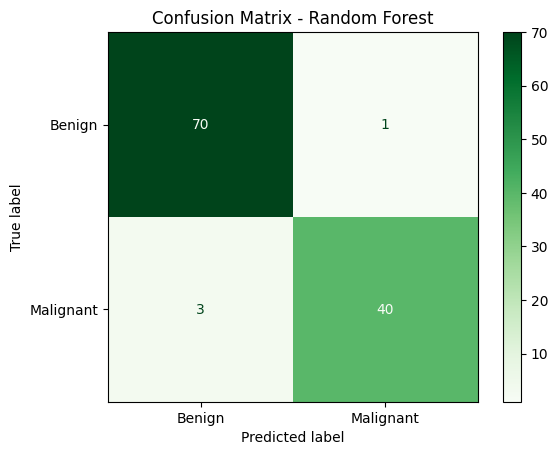

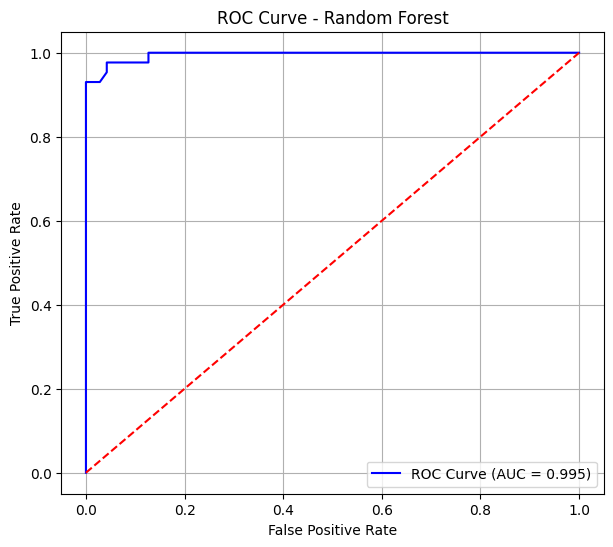

ROC AUC Value (Random Forest): 0.9953


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score
)

df = pd.read_csv("dataset.csv")

if 'id' in df.columns:
    df = df.drop(columns=['id'])

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42 )


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

y_prob = rf.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()


print(f"ROC AUC Value (Random Forest): {roc_auc:.4f}")


Dataset Shape: (569, 32)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  843

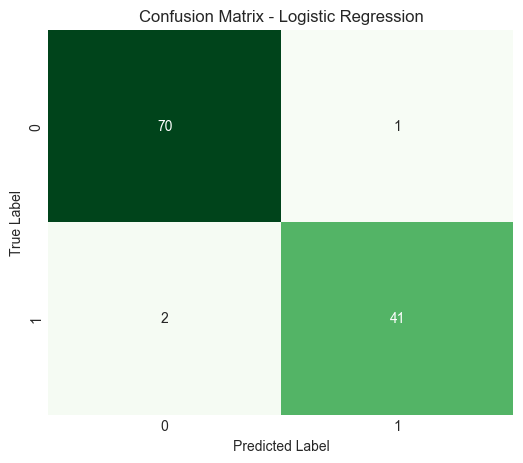

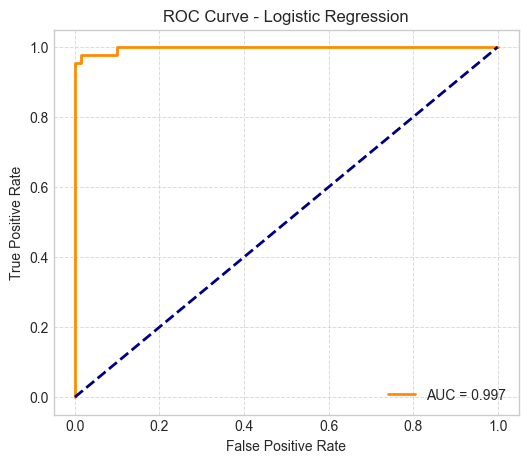


--- 10-FOLD CROSS VALIDATION ---
Fold 1 Accuracy: 98.25%
Fold 2 Accuracy: 98.25%
Fold 3 Accuracy: 98.25%
Fold 4 Accuracy: 98.25%
Fold 5 Accuracy: 98.25%
Fold 6 Accuracy: 92.98%
Fold 7 Accuracy: 100.00%
Fold 8 Accuracy: 98.25%
Fold 9 Accuracy: 94.74%
Fold 10 Accuracy: 94.64%

Mean Accuracy: 97.18%
Standard Deviation: 2.12%


In [31]:
# --- Logistic Regression for Breast Cancer Prediction with K-Fold Validation ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc, classification_report
)

# Load dataset
data = pd.read_csv("dataset.csv")

print("Dataset Shape:", data.shape)
print("Columns:", data.columns.tolist())
print(data.head())

# --- Identify and encode target variable ---
target_col = 'diagnosis'   # change if your target column name is different
le = LabelEncoder()
data[target_col] = le.fit_transform(data[target_col])

# --- Features and labels ---
X = data.drop(columns=[target_col])
y = data[target_col]

# Encode any non-numeric features in X
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# --- Feature scaling ---
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Logistic Regression Model ---
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# --- Predictions ---
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

# --- Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\n--- TEST SET EVALUATION ---")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix Plot ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- ROC Curve with Grid Lines ---
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # ✅ Added grid lines
plt.show()

# --- 10-Fold Cross Validation ---
print("\n--- 10-FOLD CROSS VALIDATION ---")
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')

# Display fold results
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} Accuracy: {score * 100:.2f}%")

print(f"\nMean Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation: {cv_scores.std() * 100:.2f}%")
